In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
# Study data file
sales_data_path = "C:/Users/cghos/Desktop/group-project/project1_saledata.csv"

# Read the data 
sales_data = pd.read_csv(sales_data_path)
sales_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
0,102001,0,United States,country,NaN,180000.0,185000.0,185000.0,187110.0,193000.0,...,330000.0,345000.0,360000.0,365000.0,365000.0,355000.0,349000.0,341307.0,335000.0,329000.0
1,394913,1,"New York, NY",msa,NY,404920.0,399000.0,399451.0,400000.0,405000.0,...,516500.0,525000.0,540000.0,546500.0,570000.0,585000.0,580000.0,560000.0,540000.0,534450.0
2,753899,2,"Los Angeles, CA",msa,CA,505000.0,495000.0,500000.0,490000.0,482000.0,...,865000.0,900000.0,935000.0,934000.0,915000.0,890000.0,878000.0,865000.0,853250.0,850000.0
3,394463,3,"Chicago, IL",msa,IL,239000.0,237500.0,240000.0,240000.0,250000.0,...,270000.0,280000.0,300000.0,306000.0,315000.0,310000.0,300000.0,285000.0,279000.0,280000.0
4,394514,4,"Dallas, TX",msa,TX,137000.0,144500.0,143500.0,145874.0,154900.0,...,368000.0,387000.0,415000.0,425000.0,424167.0,410000.0,400000.0,388000.0,385000.0,375000.0


In [3]:
Seattle_df=sales_data[sales_data["RegionName"] == "Seattle, WA"]
Seattle_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
15,395078,15,"Seattle, WA",msa,WA,334990.0,330000.0,337000.0,336950.0,335000.0,...,653000.0,706000.0,740000.0,750000.0,720000.0,680000.0,665000.0,660000.0,669950.0,630000.0


In [4]:
Tampa_df=sales_data[sales_data["RegionName"] == "Tampa, FL"]
Tampa_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
18,395148,18,"Tampa, FL",msa,FL,167346.0,170750.0,168000.0,173000.0,175000.0,...,335000.0,350000.0,357550.0,375000.0,386000.0,380000.0,370000.0,360000.0,368000.0,355000.0


In [5]:
San_Jose_df = sales_data[sales_data["RegionName"] == "San Jose, CA"]
San_Jose_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
35,395059,35,"San Jose, CA",msa,CA,692500.0,705000.0,695000.0,700000.0,680000.0,...,1400000.0,1510000.0,1550000.0,1513500.0,1465000.0,1390000.0,1350000.0,1320000.0,1325000.0,1301000.0


In [6]:
Phoenix_df = sales_data[sales_data["RegionName"] == "Phoenix, AZ"]
Phoenix_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
10,394976,10,"Phoenix, AZ",msa,AZ,227000.0,225000.0,227000.0,226000.0,225000.0,...,452000.0,469000.0,475100.0,491000.0,490000.0,470000.0,457499.0,449450.0,449000.0,430000.0


In [7]:
Austin_df = sales_data[sales_data["RegionName"] == "Austin, TX"]
Austin_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
29,394355,29,"Austin, TX",msa,TX,180500.0,185000.0,186000.0,189998.0,192000.0,...,505750.0,545000.0,565000.0,585250.0,560000.0,525000.0,512875.0,497500.0,483662.0,475000.0


In [8]:
combined_cities_1 = pd.concat([Seattle_df, Tampa_df,
                              San_Jose_df, Phoenix_df, 
                             Austin_df]) 
combined_cities_1.reset_index(inplace=True)

In [9]:
combined_cities_1.columns

Index(['index', 'RegionID', 'SizeRank', 'RegionName', 'RegionType',
       'StateName', '2008-02-29', '2008-03-31', '2008-04-30', '2008-05-31',
       ...
       '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30',
       '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30'],
      dtype='object', length=184)

In [10]:
update_combined_cities_1 = combined_cities_1.drop (columns = ["index","RegionID","SizeRank","RegionType","StateName"])
update_combined_cities_1.set_index("RegionName", inplace=True)
update_combined_cities_1

,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
RegionName,,,,,,,,,,,,,,,,,,,,,
"Seattle, WA",334990.0,330000.0,337000.0,336950.0,335000.0,332500.0,329725.0,316500.0,319540.0,303485.0,...,653000.0,706000.0,740000.0,750000.0,720000.0,680000.0,665000.0,660000.0,669950.0,630000.0
"Tampa, FL",167346.0,170750.0,168000.0,173000.0,175000.0,173000.0,167100.0,165000.0,155000.0,150000.0,...,335000.0,350000.0,357550.0,375000.0,386000.0,380000.0,370000.0,360000.0,368000.0,355000.0
"San Jose, CA",692500.0,705000.0,695000.0,700000.0,680000.0,650000.0,615000.0,600000.0,560000.0,515000.0,...,1400000.0,1510000.0,1550000.0,1513500.0,1465000.0,1390000.0,1350000.0,1320000.0,1325000.0,1301000.0
"Phoenix, AZ",227000.0,225000.0,227000.0,226000.0,225000.0,214250.0,210000.0,200000.0,200000.0,190000.0,...,452000.0,469000.0,475100.0,491000.0,490000.0,470000.0,457499.0,449450.0,449000.0,430000.0
"Austin, TX",180500.0,185000.0,186000.0,189998.0,192000.0,190000.0,190000.0,179250.0,178000.0,179925.0,...,505750.0,545000.0,565000.0,585250.0,560000.0,525000.0,512875.0,497500.0,483662.0,475000.0


In [12]:
combined_cities_list = []

for year in range(2015, 2023):
    possible_short_names = [f'{year}-{month:02d}'
                            for month in range(1, 13)]

    year_columns = [full_name
                    for full_name in update_combined_cities_1.columns
                    if full_name[:7] in possible_short_names]

    year_columns = ['RegionName'] + year_columns
    combined_cities_list.append(combined_cities_1[year_columns])
    
combined_cities_list[0]


,RegionName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31
0,"Seattle, WA",311860.0,311000.0,330000.0,340000.0,349719.0,359990.0,345000.0,350000.0,342600.0,340681.0,336000.0,338000.0
1,"Tampa, FL",145000.0,149200.0,155000.0,158000.0,165000.0,170000.0,172500.0,164900.0,165500.0,164900.0,160000.0,167000.0
2,"San Jose, CA",667500.0,713250.0,773500.0,789000.0,825000.0,838000.0,840000.0,831000.0,790000.0,795000.0,800000.0,790000.0
3,"Phoenix, AZ",199000.0,200000.0,205000.0,206000.0,215000.0,215000.0,214900.0,212000.0,215000.0,215000.0,212950.0,220000.0
4,"Austin, TX",237000.0,238000.0,246000.0,259000.0,267650.0,265000.0,261000.0,255000.0,248000.0,250000.0,254450.0,256000.0


In [14]:
combined_cities_2 = update_combined_cities_1.transpose()
combined_cities_2.head(10)

RegionName,"Seattle, WA","Tampa, FL","San Jose, CA","Phoenix, AZ","Austin, TX"
2008-02-29,334990.0,167346.0,692500.0,227000.0,180500.0
2008-03-31,330000.0,170750.0,705000.0,225000.0,185000.0
2008-04-30,337000.0,168000.0,695000.0,227000.0,186000.0
2008-05-31,336950.0,173000.0,700000.0,226000.0,189998.0
2008-06-30,335000.0,175000.0,680000.0,225000.0,192000.0
2008-07-31,332500.0,173000.0,650000.0,214250.0,190000.0
2008-08-31,329725.0,167100.0,615000.0,210000.0,190000.0
2008-09-30,316500.0,165000.0,600000.0,200000.0,179250.0
2008-10-31,319540.0,155000.0,560000.0,200000.0,178000.0
2008-11-30,303485.0,150000.0,515000.0,190000.0,179925.0


In [26]:
transposed_cities = combined_cities_2.drop(index=combined_cities_2.index[:-95])
transposed_cities_

RegionName,"Seattle, WA","Tampa, FL","San Jose, CA","Phoenix, AZ","Austin, TX"
2015-01-31,311860.0,145000.0,667500.0,199000.0,237000.0
2015-02-28,311000.0,149200.0,713250.0,200000.0,238000.0
2015-03-31,330000.0,155000.0,773500.0,205000.0,246000.0
2015-04-30,340000.0,158000.0,789000.0,206000.0,259000.0
2015-05-31,349719.0,165000.0,825000.0,215000.0,267650.0
...,...,...,...,...,...
2022-07-31,680000.0,380000.0,1390000.0,470000.0,525000.0
2022-08-31,665000.0,370000.0,1350000.0,457499.0,512875.0
2022-09-30,660000.0,360000.0,1320000.0,449450.0,497500.0
2022-10-31,669950.0,368000.0,1325000.0,449000.0,483662.0


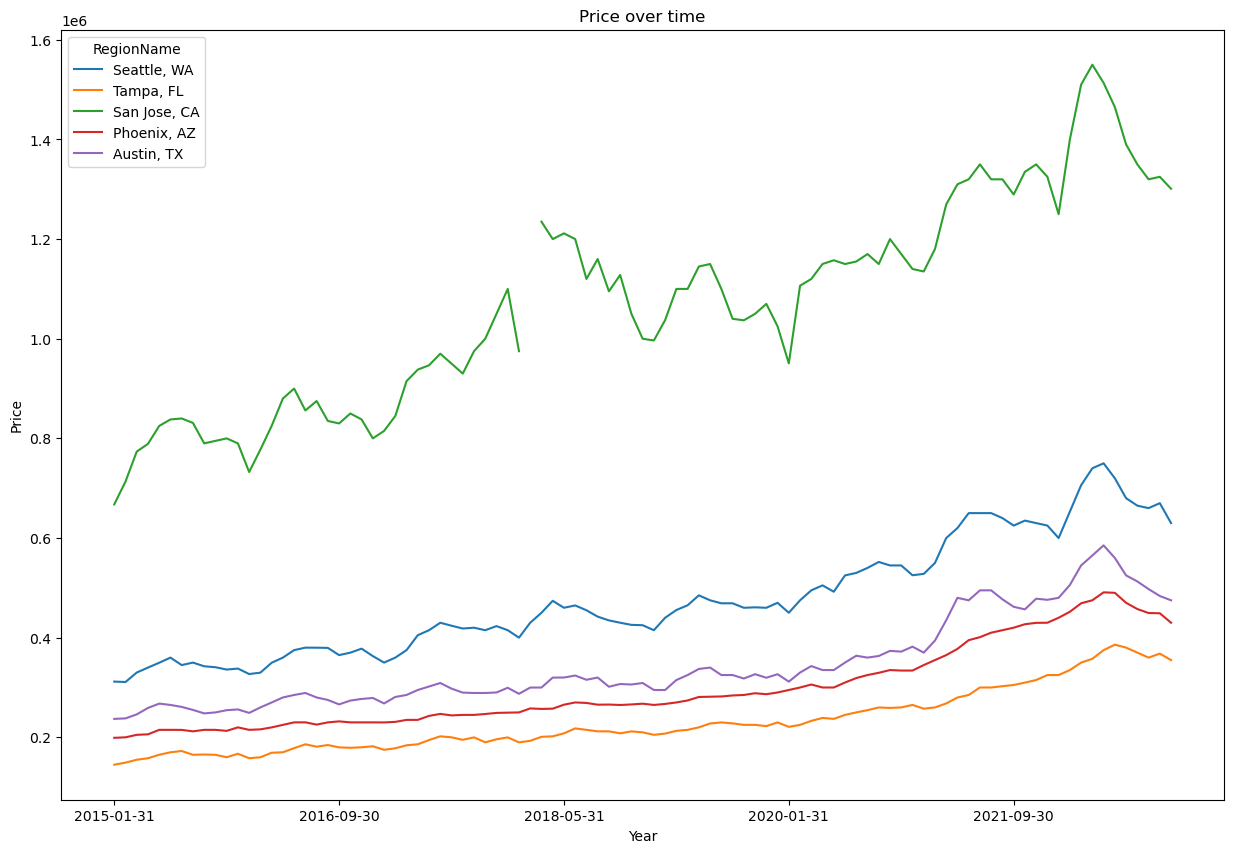

In [28]:
# lines = combined_cities_2.plot()

transposed_cities.plot(figsize=(15, 10))
plt.title('Price over time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()